Loading Data

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [89]:
df = pd.read_csv("C:/My space/coding/Python/Bank Customer Churn Prediction.csv")

Performing Data Exploration

In [90]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [92]:
df.shape

(10000, 12)

In [93]:
df.isna().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [94]:
df.duplicated().sum()

np.int64(0)

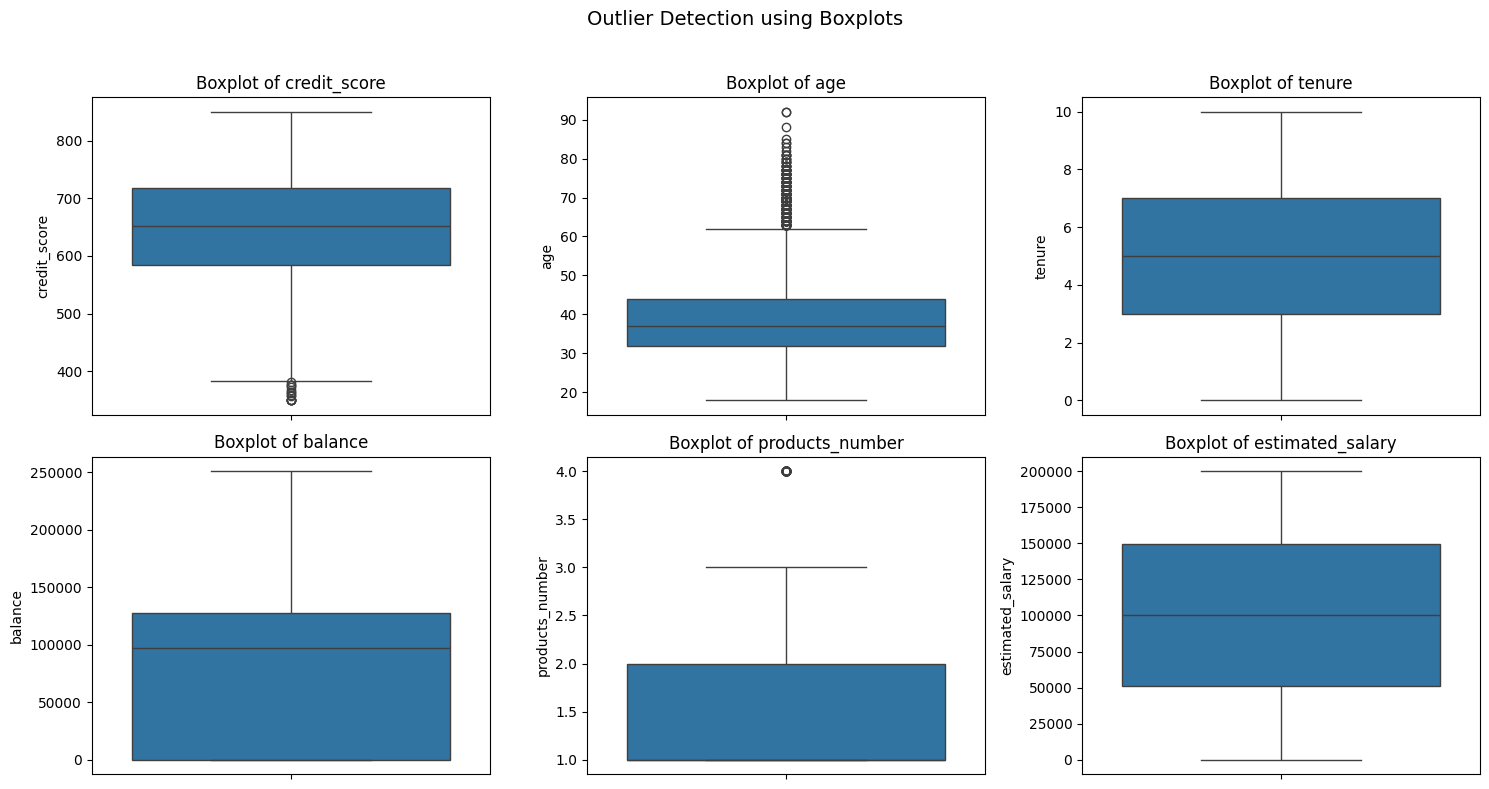

In [95]:
numerical_features = ["credit_score", "age", "tenure", "balance", 
                      "products_number", "estimated_salary"]

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
fig.suptitle("Outlier Detection using Boxplots", fontsize=14)

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot each numerical feature
for i, col in enumerate(numerical_features):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Performing EDA

Univeriate analysis

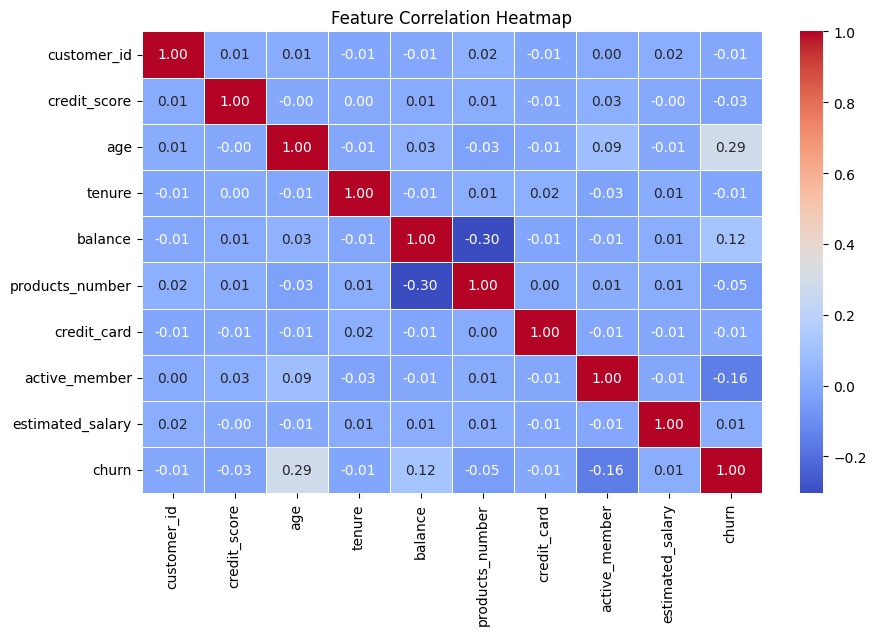

In [96]:
numeric_df = df.select_dtypes(include=["int64", "float64"])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

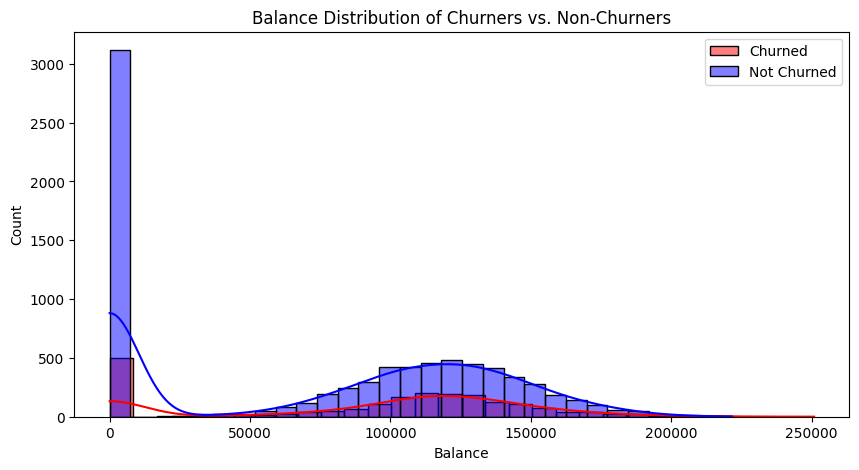

In [97]:
plt.figure(figsize=(10,5))
sns.histplot(df[df["churn"] == 1]["balance"], bins=30, kde=True, color="red", label="Churned")
sns.histplot(df[df["churn"] == 0]["balance"], bins=30, kde=True, color="blue", label="Not Churned")

# Labels & title
plt.xlabel("Balance")
plt.ylabel("Count")
plt.title("Balance Distribution of Churners vs. Non-Churners")
plt.legend()
plt.show()

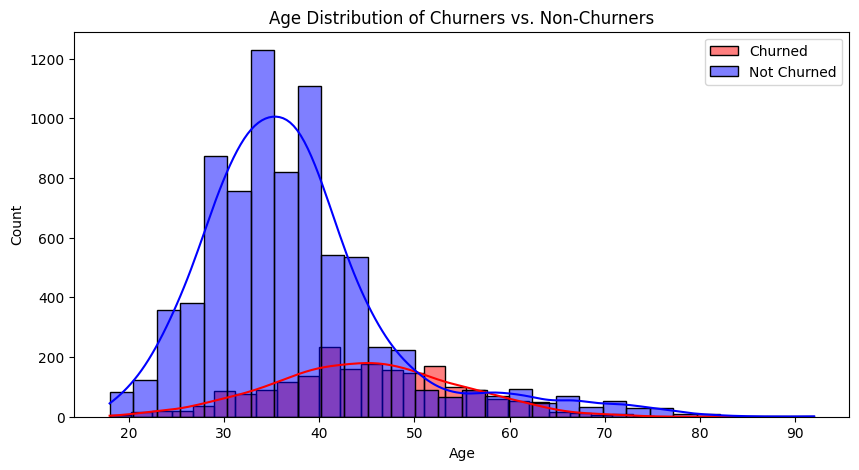

In [98]:
plt.figure(figsize=(10,5))
sns.histplot(df[df["churn"] == 1]["age"], bins=30, kde=True, color="red", label="Churned")
sns.histplot(df[df["churn"] == 0]["age"], bins=30, kde=True, color="blue", label="Not Churned")

# Labels & title
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution of Churners vs. Non-Churners")
plt.legend()
plt.show()

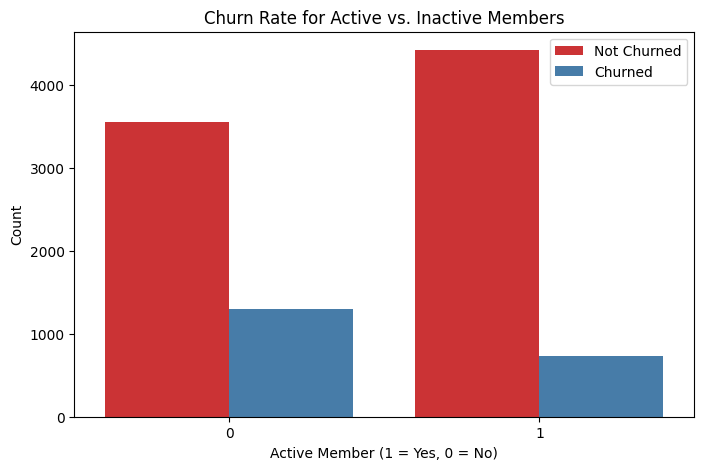

In [99]:
plt.figure(figsize=(8,5))
sns.countplot(x="active_member", hue="churn", data=df, palette="Set1")

# Labels & title
plt.xlabel("Active Member (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.title("Churn Rate for Active vs. Inactive Members")
plt.legend(["Not Churned", "Churned"])
plt.show()

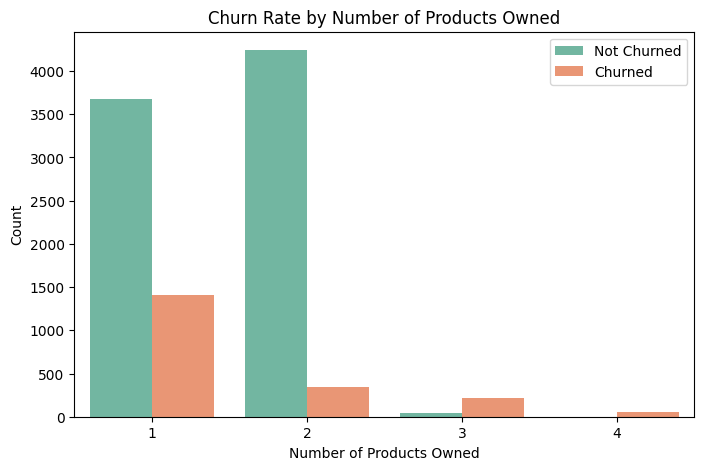

In [100]:
plt.figure(figsize=(8,5))
sns.countplot(x="products_number", hue="churn", data=df, palette="Set2")

# Labels & title
plt.xlabel("Number of Products Owned")
plt.ylabel("Count")
plt.title("Churn Rate by Number of Products Owned")
plt.legend(["Not Churned", "Churned"])
plt.show()

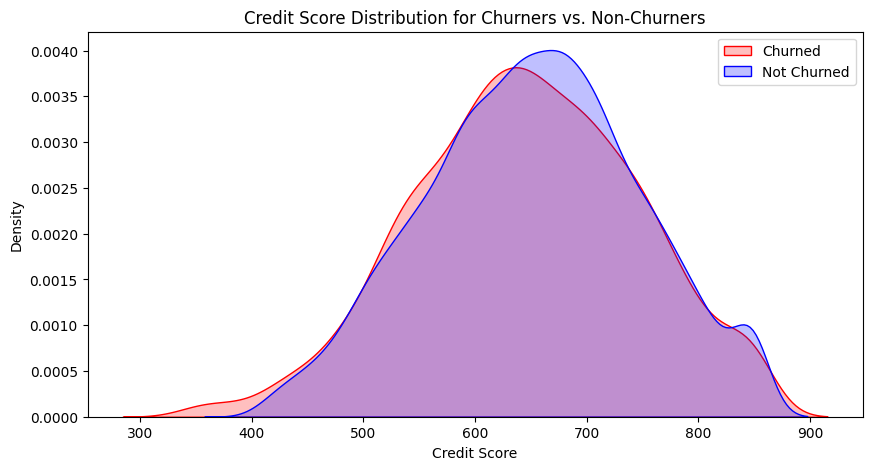

In [101]:
plt.figure(figsize=(10,5))
sns.kdeplot(df[df["churn"] == 1]["credit_score"], color="red", label="Churned", fill=True)
sns.kdeplot(df[df["churn"] == 0]["credit_score"], color="blue", label="Not Churned", fill=True)

# Labels & title
plt.xlabel("Credit Score")
plt.ylabel("Density")
plt.title("Credit Score Distribution for Churners vs. Non-Churners")
plt.legend()
plt.show()

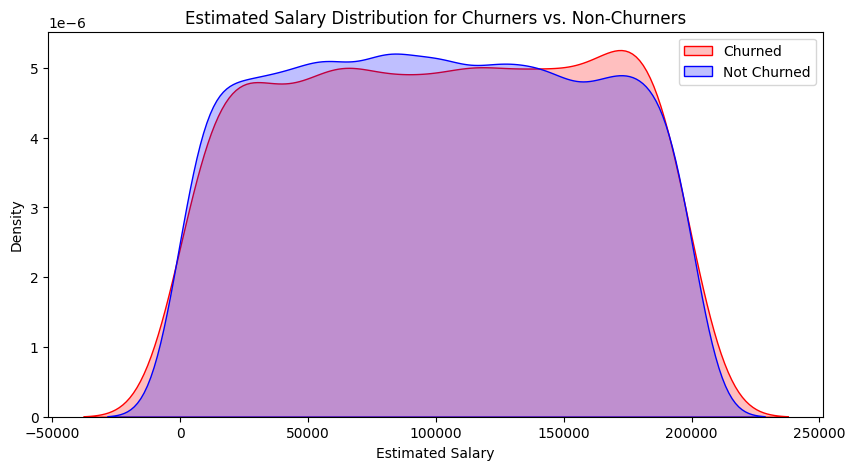

In [102]:
plt.figure(figsize=(10,5))
sns.kdeplot(df[df["churn"] == 1]["estimated_salary"], color="red", label="Churned", fill=True)
sns.kdeplot(df[df["churn"] == 0]["estimated_salary"], color="blue", label="Not Churned", fill=True)

# Labels & title
plt.xlabel("Estimated Salary")
plt.ylabel("Density")
plt.title("Estimated Salary Distribution for Churners vs. Non-Churners")
plt.legend()
plt.show()

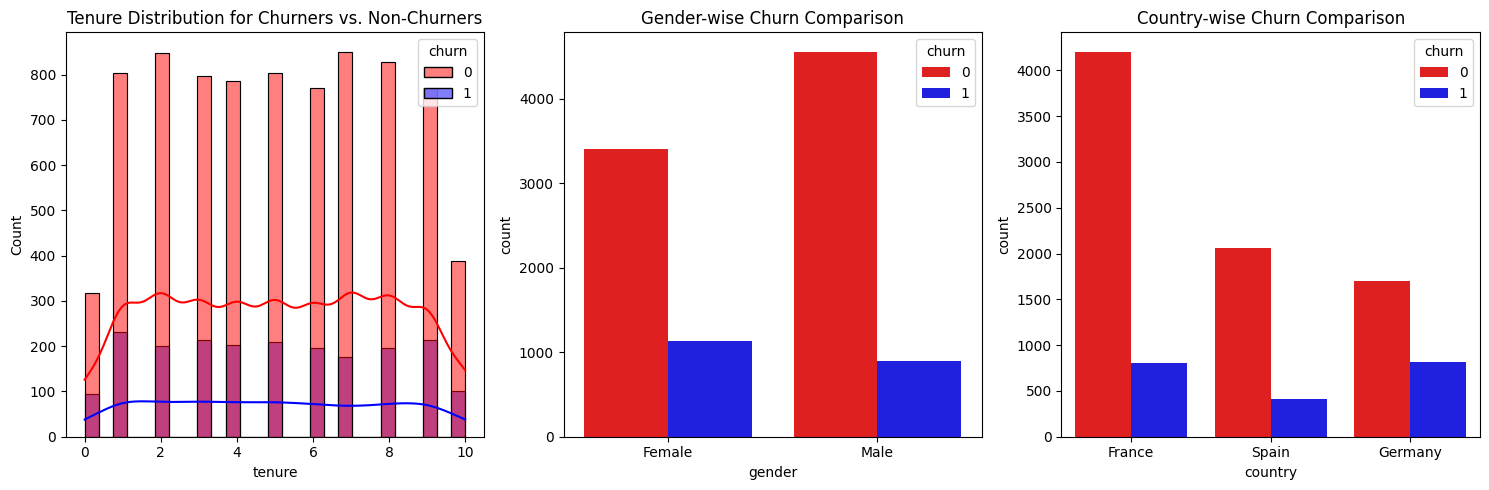

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(15, 5))

# Tenure Distribution
plt.subplot(1, 3, 1)
sns.histplot(data=df, x="tenure", hue="churn", kde=True, palette=["red", "blue"])
plt.title("Tenure Distribution for Churners vs. Non-Churners")

# Gender Distribution
plt.subplot(1, 3, 2)
sns.countplot(data=df, x="gender", hue="churn", palette=["red", "blue"])
plt.title("Gender-wise Churn Comparison")

# Country Distribution
plt.subplot(1, 3, 3)
sns.countplot(data=df, x="country", hue="churn", palette=["red", "blue"])
plt.title("Country-wise Churn Comparison")

plt.tight_layout()
plt.show()

multivariate analysis

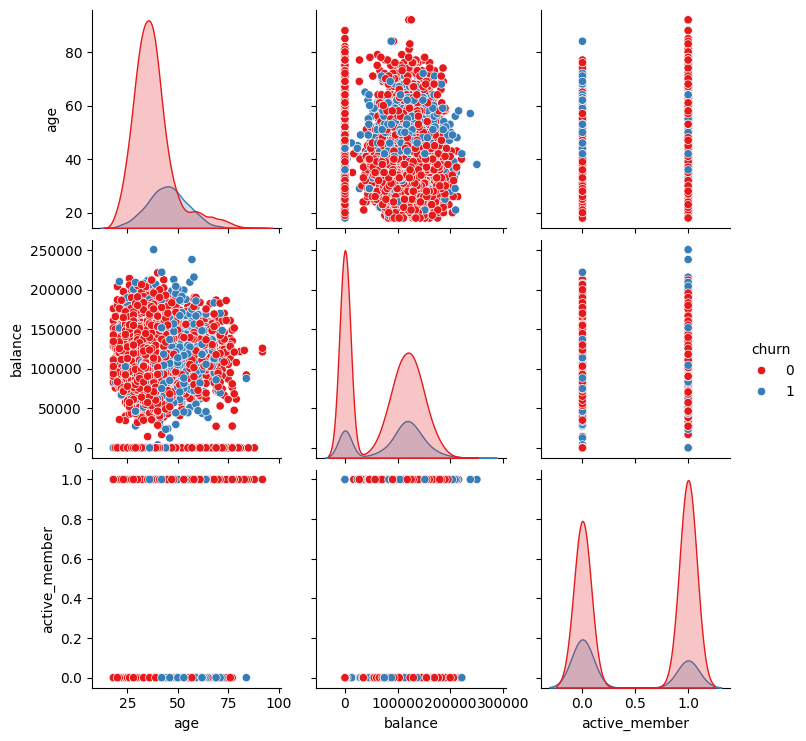

In [104]:
cols = ["age", "balance", "active_member", "churn"]

# Pairplot to visualize relationships
sns.pairplot(df[cols], hue="churn", palette="Set1", diag_kind="kde")
plt.show()

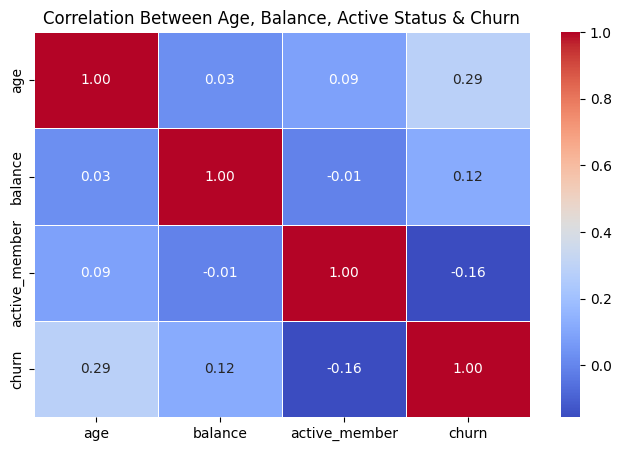

In [105]:
plt.figure(figsize=(8,5))
corr_matrix = df[cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Title
plt.title("Correlation Between Age, Balance, Active Status & Churn")
plt.show()

Logistic Regression for Feature Importance

C:\Users\ANURAG\AppData\Local\Temp\ipykernel_10220\3090876759.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Age", "Balance", "Active Member"], y=importance, palette="viridis")


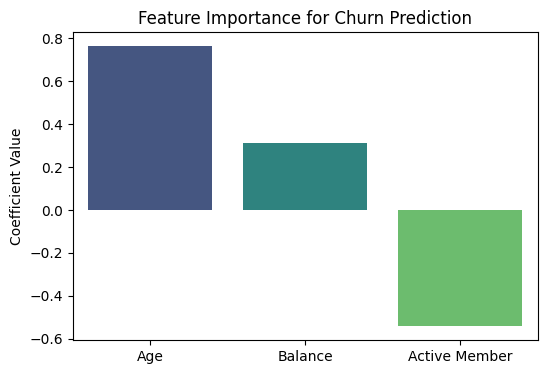

In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Selecting features and target
X = df[["age", "balance", "active_member"]]
y = df["churn"]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_scaled, y)

# Get feature importance
importance = model.coef_[0]

# Plot feature importance
plt.figure(figsize=(6,4))
sns.barplot(x=["Age", "Balance", "Active Member"], y=importance, palette="viridis")
plt.title("Feature Importance for Churn Prediction")
plt.ylabel("Coefficient Value")
plt.show()


In [107]:
# Check for missing values
print(df.isnull().sum())

# Drop unnecessary columns (if any)
df.drop(columns=['customer_id'], inplace=True, errors='ignore')

# Encode categorical variables
label_enc = LabelEncoder()
df['gender'] = label_enc.fit_transform(df['gender'])  # Male=1, Female=0

# One-hot encoding for categorical features
df = pd.get_dummies(df, columns=['country'], drop_first=True)


# Display updated dataframe
df.head()


customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64


,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True


In [124]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df[['credit_score', 'age', 'tenure', 'balance', 
        'products_number', 'credit_card', 'active_member']]  
y = df['churn']

# Split into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define numerical & categorical features
num_features = ['credit_score', 'age',  'tenure', 'balance', 'products_number']
cat_features = ['credit_card', 'active_member']  # Removed 'gender'

# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_features),   # Standardize numerical features
    ('cat', OneHotEncoder(drop='first'), cat_features)  # Encode categorical features
])

# Transform training & test data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Adjust class imbalance
scale_pos_weight = np.sum(y_train == 0) / np.sum(y_train == 1)

In [117]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Accuracy: 0.8535
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91      1593
           1       0.73      0.44      0.55       407

    accuracy                           0.85      2000
   macro avg       0.80      0.70      0.73      2000
weighted avg       0.84      0.85      0.84      2000

Confusion Matrix:
 [[1528   65]
 [ 228  179]]


In [118]:
# Feature Importance
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance in Random Forest")
plt.show()


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [125]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.calibration import CalibratedClassifierCV

# Train base XGBoost model with probability calibration
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                              scale_pos_weight=scale_pos_weight,
                              max_depth=4, min_child_weight=3,
                              random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]  # Get churn probabilities

# Evaluation
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
report_xgb = classification_report(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# Display results
print("XGBoost Accuracy:", accuracy_xgb)
print("Classification Report:\n", report_xgb)
print("Confusion Matrix:\n", conf_matrix_xgb)

XGBoost Accuracy: 0.786
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.81      0.86      1593
           1       0.48      0.71      0.57       407

    accuracy                           0.79      2000
   macro avg       0.70      0.76      0.72      2000
weighted avg       0.83      0.79      0.80      2000

Confusion Matrix:
 [[1285  308]
 [ 120  287]]


C:\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [03:50:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [126]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Grid Search with cross-validation
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Train final model with best parameters
best_xgb = XGBClassifier(**grid_search.best_params_, use_label_encoder=False, eval_metric='logloss')
best_xgb.fit(X_train, y_train)

# Evaluate on test data
y_pred = best_xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Optimized XGBoost Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 72 candidates, totalling 360 fits


C:\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [03:51:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Best Score: 0.859
Optimized XGBoost Accuracy: 0.86
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.78      0.43      0.56       407

    accuracy                           0.86      2000
   macro avg       0.83      0.70      0.74      2000
weighted avg       0.85      0.86      0.84      2000



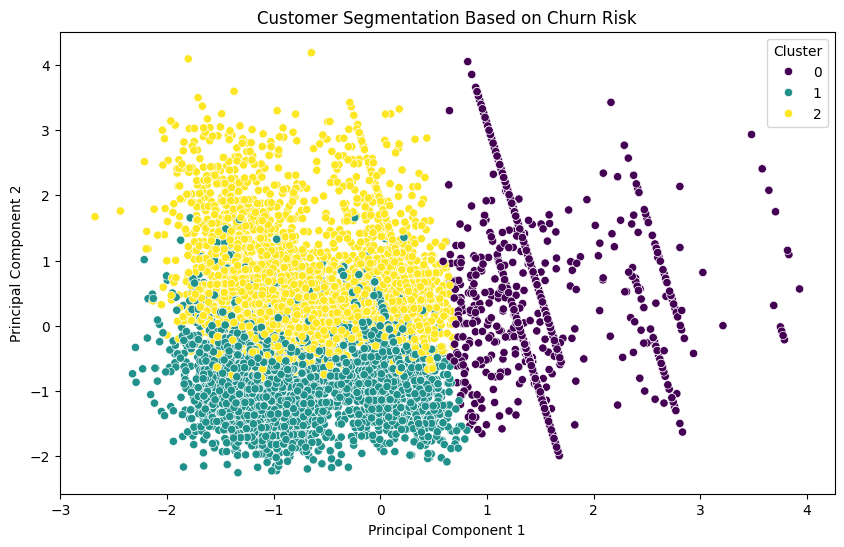

In [113]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Selecting important features based on our analysis
features = ['age', 'balance', 'products_number', 'active_member']
X = df[features]

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA for visualization (reduce to 2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Convert PCA output to DataFrame
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = df['Cluster']

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue=df_pca['Cluster'], palette='viridis', data=df_pca)
plt.title("Customer Segmentation Based on Churn Risk")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()

Predictive Dahboard

In [127]:
import joblib

# Save the trained model
joblib.dump(xgb_model, "optimized_xgb_model.pkl")
print("Model saved successfully!")


Model saved successfully!


In [128]:
import joblib
scaler.fit(X_train)
# Assuming you used StandardScaler during training
joblib.dump(scaler, "scaler.pkl")
print("✅ Scaler saved successfully!")


✅ Scaler saved successfully!


In [123]:
print("Model Features:", xgb_model.get_booster().feature_names)


Model Features: None


In [57]:
print(y_train.value_counts(normalize=True))  # See churn ratio


churn
0    0.79625
1    0.20375
Name: proportion, dtype: float64


In [60]:
print(pd.DataFrame({"Feature": selected_features, "Importance": xgb_model.feature_importances_}).sort_values(by="Importance", ascending=False))


            Feature  Importance
5   products_number    0.371224
7     active_member    0.208103
2               age    0.136681
4           balance    0.058740
1            gender    0.053097
0      credit_score    0.044991
8  estimated_salary    0.044560
6       credit_card    0.041432
3            tenure    0.041172


In [72]:
prob_no_churn, prob_churn = best_xgb.predict_proba(X_test)[0]
print(f"Probabilities - No Churn: {prob_no_churn}, Churn: {prob_churn}")


Probabilities - No Churn: 0.9794544577598572, Churn: 0.020545536652207375
